In [ ]:
import pandas as pd

df = pd.read_csv('../renttherunway_data.csv')

df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [275]:
#컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   user_id                      192544 non-null  int64  
 1   bust size                    192544 non-null  object 
 2   item_id                      192544 non-null  int64  
 3   weight                       192544 non-null  object 
 4   rating                       192462 non-null  float64
 5   category                     192544 non-null  object 
 6   height                       191867 non-null  object 
 7   size                         192544 non-null  int64  
 8   age                          191584 non-null  float64
 9   body_type_                   192544 non-null  bool   
 10  body_type_apple              192544 non-null  bool   
 11  body_type_athletic           192544 non-null  bool   
 12  body_type_full bust          192544 non-null  bool   
 13 

수치형 데이터 확인

In [231]:
df.describe()

,user_id,item_id,size,age,rating_5
count,192544.000000,1.925440e+05,192544.000000,191584.000000,192462.000000
mean,499494.100149,1.045684e+06,12.245175,33.871017,4.546186
std,289059.719328,8.053148e+05,8.494877,8.058083,0.715022
min,9.000000,1.233730e+05,0.000000,0.000000,1.000000
25%,250654.250000,1.950760e+05,8.000000,29.000000,4.000000
50%,499419.000000,9.483960e+05,12.000000,32.000000,5.000000
75%,750974.000000,1.678888e+06,16.000000,37.000000,5.000000
max,999997.000000,2.966087e+06,58.000000,117.000000,5.000000


결측값 정보 출력, 처리

In [271]:
# 각 열별 결측값 개수 확인
print("결측값 개수:")
print(df.isnull().sum())

결측값 개수:
user_id                          0
bust size                        0
item_id                          0
weight                           0
rating                          82
category                         0
height                         677
size                             0
age                            960
body_type_                       0
body_type_apple                  0
body_type_athletic               0
body_type_full bust              0
body_type_hourglass              0
body_type_pear                   0
body_type_petite                 0
body_type_straight & narrow      0
fit_fit                          0
fit_large                        0
fit_small                        0
dtype: int64


In [241]:
# 결측값이 있는 행의 비율 확인
print("\n결측값이 있는 행의 비율:")
print((df.isnull().sum() / len(df)) * 100)


결측값이 있는 행의 비율:
fit          0.000000
user_id      0.000000
bust size    0.000000
item_id      0.000000
weight       0.000000
rating       0.042588
body type    0.000000
category     0.000000
height       0.351608
size         0.000000
age          0.498587
dtype: float64


In [240]:
#weight 열 결측값 0으로 처리, 나중에 knn사용해서 다시 예측, 29,982개
df['weight'] = df['weight'].fillna(0)

#bust size 열 결측값 처리, 빈 문자열 처리, 18,411개
df['bust size'] = df['bust size'].fillna('')

#body type 열 결측값 처리, 빈 문자열 처리 , 14,637개
df['body type'] = df['body type'].fillna('')

Rating 정보 출력

In [186]:
#평점 값들 출력력
print("평점 고유값:",df['rating'].unique)

#평점 빈도수 출력
rating_counts = df['rating'].value_counts()
print("\n평점별 빈도수:")
print(rating_counts)

평점 고유값: <bound method Series.unique of 0         10.0
1         10.0
2         10.0
3          8.0
4         10.0
          ... 
192539    10.0
192540    10.0
192541     6.0
192542    10.0
192543    10.0
Name: rating, Length: 192544, dtype: float64>

평점별 빈도수:
rating
10.0    124537
8.0      53391
6.0      10697
4.0       2791
2.0       1046
Name: count, dtype: int64


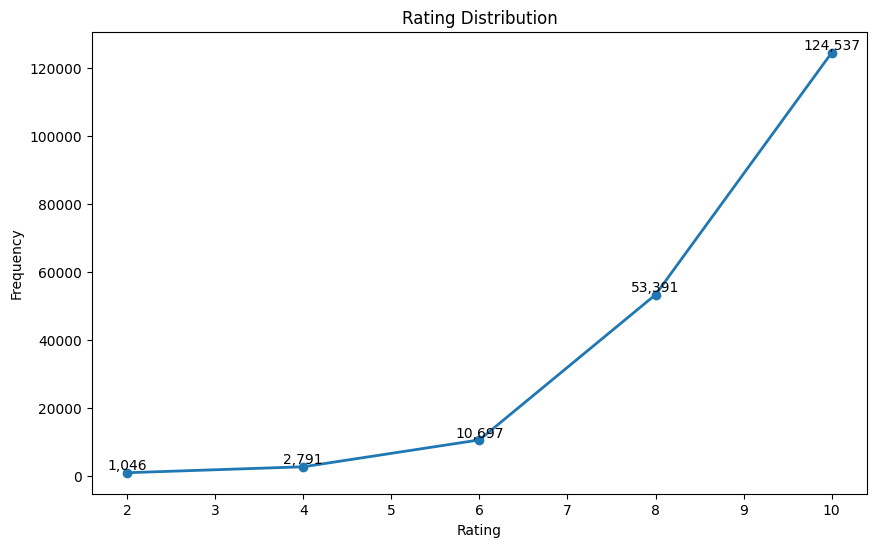

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

#그래프 크기기
plt.figure(figsize=(10, 6))

# 평점별 빈도수를 계산
rating_counts = df['rating'].value_counts().sort_index()

# 선 그래프 그리기
plt.plot(rating_counts.index, rating_counts.values, marker='o', linewidth=2)

# 그래프 제목과 축 레이블 설정
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# x축 눈금 설정
plt.xticks(range(2, 11))  # 2부터 10까지의 정수로 눈금 표시

# 각 점 위에 숫자 표시
for x, y in zip(rating_counts.index, rating_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

평점 변환 (1~5점)

In [1]:
# 10점을 5점으로 변환하는 함수
def convert_rating(rating):
    return round((rating - 1) * (4/9) + 1, 1)  # 1-10점을 1-5점으로 변환

# 변환 적용
df['rating_5'] = df['rating'].apply(convert_rating)

# 결과 확인
print("변환된 평점 분포:")
print(df['rating_5'].value_counts().sort_index())

NameError: name 'df' is not defined

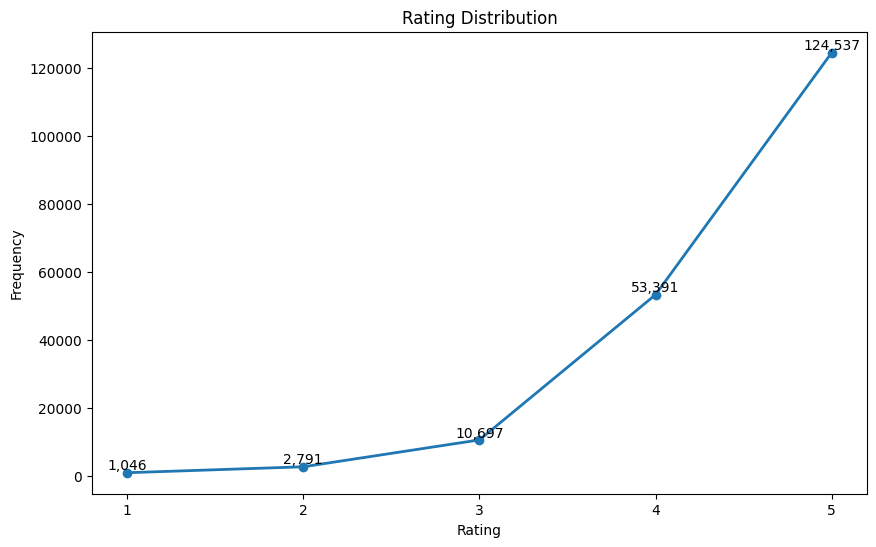

In [189]:
plt.figure(figsize=(10, 6))

# 평점별 빈도수를 계산
rating5_counts = df['rating_5'].value_counts().sort_index()

# 선 그래프 그리기
plt.plot(rating5_counts.index, rating5_counts.values, marker='o', linewidth=2)

# 그래프 제목과 축 레이블 설정
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# x축 눈금 설정
plt.xticks(range(1, 6))  # 2부터 10까지의 정수로 눈금 표시

# 각 점 위에 숫자 표시
for x, y in zip(rating5_counts.index, rating5_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

Fit 정보 출력

In [190]:
# fit 열의 고유값 확인
print("fit 열의 고유값:", df['fit'].unique())

# fit 열의 빈도수 확인
fit_counts = df['fit'].value_counts()
print("\nfit 열의 빈도수:")
print(fit_counts)

fit 열의 고유값: ['fit' 'small' 'large']

fit 열의 빈도수:
fit
fit      142058
small     25779
large     24707
Name: count, dtype: int64


In [ ]:
#원핫인코딩 전 fit 열 표 출력
plt.figure(figsize=(10, 6))

fit_counts = df['fit'].value_counts()

plt.plot(fit_counts.index, fit_counts.values, marker='o', linewidth=2)
plt.title('Fit Distribution')
plt.xlabel('Fit')
plt.ylabel('Frequency')

for x, y in zip(fit_counts.index, fit_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()


KeyError: 'fit'

<Figure size 1000x600 with 0 Axes>

In [258]:
#범주형 데이터 처리, fit 열 원핫인코딩
fit_one_hot = pd.get_dummies(df['fit'], prefix='fit')
df = pd.concat([df, fit_one_hot], axis=1)

#fit 열 삭제
df = df.drop('fit', axis=1)

In [259]:
# One-hot 인코딩된 컬럼들의 합계 확인
print(df.filter(like='fit_').sum())

fit_fit      142058
fit_large     24707
fit_small     25779
dtype: int64


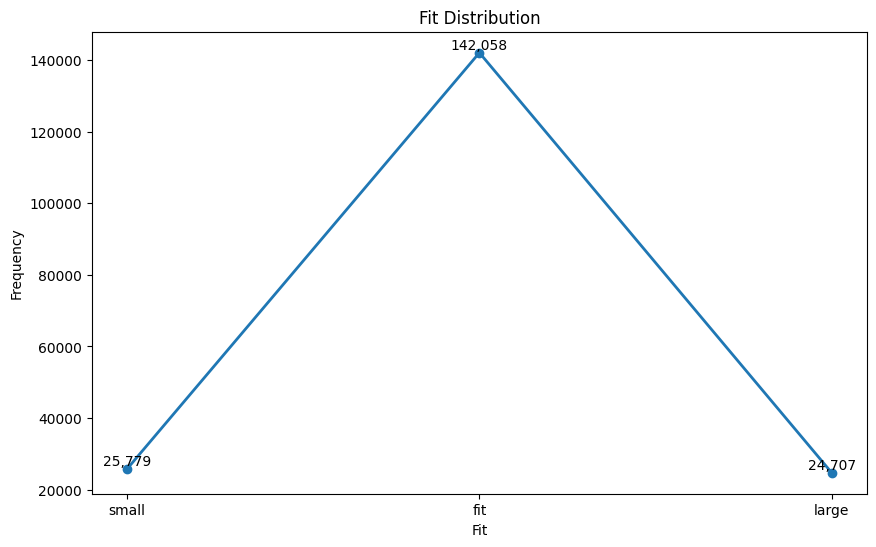

In [260]:
#원핫인코딩 후 표 다시 출력

# 1. 원핫 컬럼 리스트
fit_columns = ['fit_small', 'fit_fit', 'fit_large']

# 2. 각 카테고리별 합계를 구함 (value_counts와 같은 역할)
fit_counts = df[fit_columns].sum()

# 3. 시각화
plt.figure(figsize=(10,6))
plt.plot(fit_counts.index.str.replace('fit_', ''),  # 보기 좋게 이름 정리
         fit_counts.values, marker='o', linewidth=2)

plt.title('Fit Distribution')
plt.xlabel('Fit')
plt.ylabel('Frequency')

for x, y in zip(fit_counts.index.str.replace('fit_', ''), fit_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

Body Type 정보 출력

In [273]:
df['body type'].value_counts()

KeyError: 'body type'

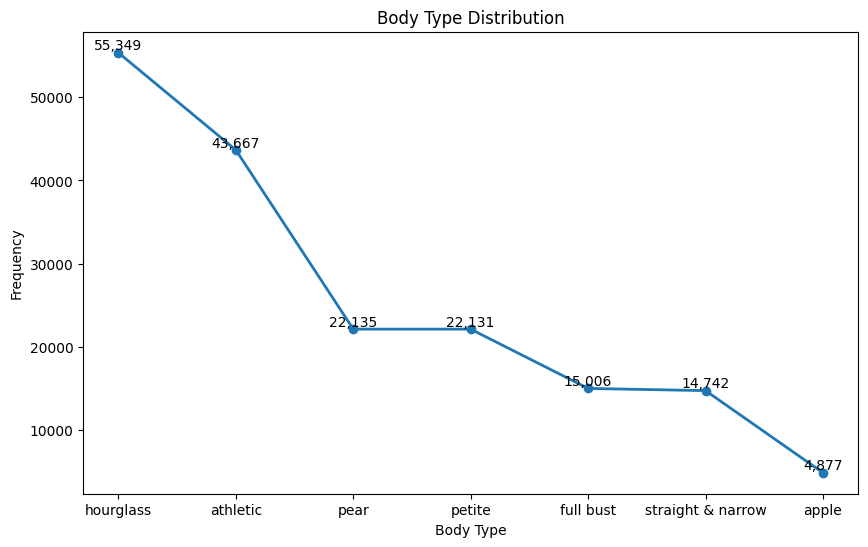

In [193]:
plt.figure(figsize=(10, 6))

body_type_counts = df['body type'].value_counts()

plt.plot(body_type_counts.index, body_type_counts.values, marker='o', linewidth=2)
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')

for x, y in zip(body_type_counts.index, body_type_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

In [274]:
body_type_one_hot = pd.get_dummies(df['body type'], prefix='body_type')
df = pd.concat([df, body_type_one_hot], axis=1)
df = df.drop('body type', axis=1)

# One-hot 인코딩된 컬럼들의 합계 확인
print(df.filter(like='body_type_').sum())

KeyError: 'body type'

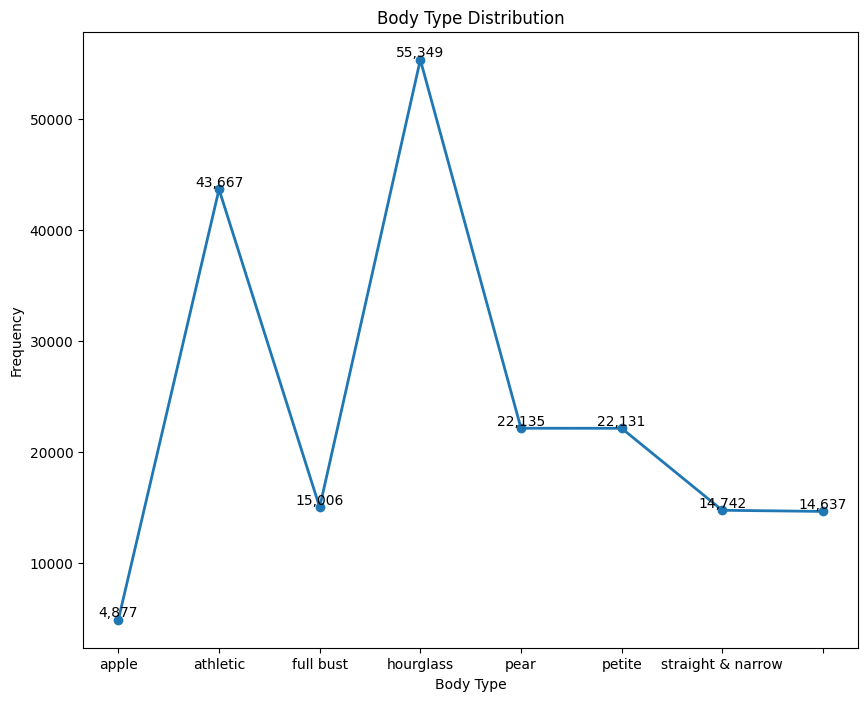

In [276]:
body_type_columns = ['body_type_apple', 'body_type_athletic', 'body_type_full bust', 'body_type_hourglass', 'body_type_pear', 'body_type_petite', 'body_type_straight & narrow', 'body_type_']

# 2. 각 카테고리별 합계를 구함 (value_counts와 같은 역할)
body_type_counts = df[body_type_columns].sum()

# 3. 시각화
plt.figure(figsize=(10, 8))

plt.plot(body_type_counts.index.str.replace('body_type_', ''), body_type_counts.values, marker='o', linewidth=2)
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')

for x, y in zip(body_type_counts.index.str.replace('body_type_', ''), body_type_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

Bust Size 정보 출력

In [272]:
print("bust size 고유값:\n",df['bust size'].unique())


print("\nbust size 빈도수:\n",df['bust size'].value_counts())

bust size 고유값:
 ['34d' '34b' '' '34c' '32b' '34d+' '36d' '36a' '32d+' '36c' '32c' '32dd'
 '30dd' '32d' '36b' '34a' '34dd' '40ddd/e' '32a' '38d+' '38c' '34ddd/e'
 '38a' '38b' '38d' '36ddd/e' '38dd' '38f' '42dd' '36dd' '40g' '40dd' '28f'
 '30ddd/e' '32ddd/e' '28b' '36d+' '40d' '28dd' '34f' '42c' '30d' '30b'
 '42d' '34aa' '32aa' '36f' '28c' '40b' '36aa' '34g' '32f' '42ddd/e' '40c'
 '28g' '28aa' '36g' '30a' '44ddd/e' '30c' '30aa' '44dd' '32i' '32g' '30g'
 '38h' '30h' '34j' '38ddd/e' '32h' '28a' '44d' '40h' '38g' '34h' '36j'
 '40f' '36h' '28ddd/e' '44f' '34i' '30f' '36i' '30i' '28h' '42b' '42j'
 '32j' '46c' '48d' '38aa' '38i' '48dd' '28d' '28i' '46ddd/e' '42g' '44c'
 '42f' '40j' '38j' '46f' '44b' '44g' '42h' '40i' '44h']

bust size 빈도수:
 bust size
34b    27285
34c    23139
       18411
34d    18029
36c    13516
       ...  
42j        1
28i        1
42h        1
40i        1
44h        1
Name: count, Length: 107, dtype: int64


In [195]:
# 'ddd/e'가 포함된 값들만 필터링
ddd_values = df[df['bust size'].str.contains('ddd/e', na=False)]['bust size']

# 고유값과 개수 출력
print("ddd/e가 포함된 값들:")
print(ddd_values.value_counts())

# 총 개수 출력
print(f"\nddd/e가 포함된 값의 총 개수: {len(ddd_values)}")

ddd/e가 포함된 값들:
bust size
34ddd/e    1030
32ddd/e     726
36ddd/e     445
38ddd/e     190
30ddd/e     108
40ddd/e      47
42ddd/e      30
28ddd/e      12
44ddd/e      11
46ddd/e       3
Name: count, dtype: int64

ddd/e가 포함된 값의 총 개수: 2602


weight 정보 출력

In [197]:

print("weight 고유값:\n",df['weight'].unique())

weight 고유값:
 ['137lbs' '132lbs' 0 '135lbs' '145lbs' '138lbs' '112lbs' '118lbs' '114lbs'
 '120lbs' '142lbs' '140lbs' '170lbs' '143lbs' '115lbs' '123lbs' '122lbs'
 '165lbs' '130lbs' '155lbs' '105lbs' '190lbs' '150lbs' '136lbs' '128lbs'
 '174lbs' '125lbs' '110lbs' '160lbs' '180lbs' '175lbs' '134lbs' '109lbs'
 '124lbs' '250lbs' '195lbs' '231lbs' '161lbs' '126lbs' '210lbs' '215lbs'
 '220lbs' '163lbs' '106lbs' '178lbs' '157lbs' '185lbs' '108lbs' '200lbs'
 '92lbs' '117lbs' '146lbs' '116lbs' '141lbs' '103lbs' '121lbs' '127lbs'
 '111lbs' '152lbs' '172lbs' '107lbs' '133lbs' '248lbs' '154lbs' '153lbs'
 '131lbs' '156lbs' '129lbs' '186lbs' '100lbs' '113lbs' '148lbs' '119lbs'
 '166lbs' '144lbs' '158lbs' '95lbs' '234lbs' '139lbs' '230lbs' '184lbs'
 '102lbs' '205lbs' '168lbs' '162lbs' '147lbs' '98lbs' '225lbs' '204lbs'
 '89lbs' '159lbs' '96lbs' '176lbs' '212lbs' '149lbs' '240lbs' '198lbs'
 '169lbs' '260lbs' '196lbs' '104lbs' '173lbs' '179lbs' '101lbs' '239lbs'
 '182lbs' '151lbs' '164lbs' '218lbs' '171

In [198]:
print("\nweight 빈도수:\n",df['weight'].value_counts())


weight 빈도수:
 weight
0         29982
130lbs    14370
135lbs    13705
125lbs    12869
140lbs    12162
          ...  
249lbs        1
261lbs        1
273lbs        1
87lbs         1
251lbs        1
Name: count, Length: 191, dtype: int64


In [ ]:
#weight 열 데이터 파운드->kg 변환
df['weight_kg'] = (df['weight'].astype(str).str.replace('lbs', '', regex=False).astype(float).mul(0.45).round(1))

#weight_kg 열 데이터 확인
print("\nweight_kg 고유값:\n",df['weight_kg'].unique())
print("\nweight_kg 빈도수:\n",df['weight_kg'].value_counts())

#weight 열= weight_kg 열, weight_kg 컬럼럼 삭제
df['weight']=df['weight_kg']
df=df.drop('weight_kg',axis=1)


weight_kg 고유값:
 [27.7 26.7  0.  27.4 29.3 27.9 22.7 23.9 23.1 24.3 28.8 28.4 34.4 29.
 23.3 24.9 24.7 33.4 26.3 31.4 21.2 38.5 30.4 27.5 25.9 35.2 25.3 22.3
 32.4 36.4 35.5 27.1 22.1 25.1 50.6 39.5 46.8 32.6 25.5 42.5 43.6 44.6
 33.  21.5 36.  31.8 37.4 21.9 40.5 18.6 23.7 29.6 23.5 28.5 20.9 24.5
 25.7 22.5 30.8 34.8 21.7 26.9 50.2 31.2 31.  26.6 31.6 26.1 37.7 20.2
 22.9 30.  24.1 33.6 29.2 32.  19.3 47.4 28.2 46.6 37.3 20.7 41.5 34.
 32.8 29.8 19.8 45.5 41.3 18.  32.2 19.4 35.6 42.9 30.2 48.6 40.1 34.2
 52.6 39.7 21.1 35.1 36.3 20.4 48.4 36.9 30.6 33.2 44.1 34.6 51.7 19.6
 54.7 37.9 18.2 40.3 47.6 39.1 38.9 38.2 40.7 49.6 38.7 41.7 43.7 33.8
 38.1 41.1 42.3 45.4 35.8 53.6 55.9 44.4 20.1 42.8 39.3 56.7 41.9 42.1
 57.7 39.9 58.7 17.6 48.2 18.8 43.3 46.  10.1 43.9 19.  14.2 17.8 37.1
 60.8 55.3 36.6 52.8 49.8 50.4 40.9 48.8 47.8 51.8 48.  47.2 45.  47.
 55.7 46.2 45.2 16.  46.4 53.5 54.4 50.  45.8 44.7 18.4 43.2 49.  58.3
 53.3 11.7 17.2 16.2 51.2 17.4 49.2 54.9 50.8]

weight_kg 빈도수:


In [282]:
#weight 열 데이터 확인, 0은 나중에 유효값으로 변환환
print(df['weight'].value_counts())

print("\nweight 고유값:\n",df['weight'].unique())
print("\nweight 빈도수:\n",df['weight'].value_counts())

weight
0.0     29982
26.3    14370
27.4    13705
25.3    12869
28.4    12162
        ...  
50.4        1
52.8        1
55.3        1
17.6        1
50.8        1
Name: count, Length: 191, dtype: int64

weight 고유값:
 [27.7 26.7  0.  27.4 29.3 27.9 22.7 23.9 23.1 24.3 28.8 28.4 34.4 29.
 23.3 24.9 24.7 33.4 26.3 31.4 21.2 38.5 30.4 27.5 25.9 35.2 25.3 22.3
 32.4 36.4 35.5 27.1 22.1 25.1 50.6 39.5 46.8 32.6 25.5 42.5 43.6 44.6
 33.  21.5 36.  31.8 37.4 21.9 40.5 18.6 23.7 29.6 23.5 28.5 20.9 24.5
 25.7 22.5 30.8 34.8 21.7 26.9 50.2 31.2 31.  26.6 31.6 26.1 37.7 20.2
 22.9 30.  24.1 33.6 29.2 32.  19.3 47.4 28.2 46.6 37.3 20.7 41.5 34.
 32.8 29.8 19.8 45.5 41.3 18.  32.2 19.4 35.6 42.9 30.2 48.6 40.1 34.2
 52.6 39.7 21.1 35.1 36.3 20.4 48.4 36.9 30.6 33.2 44.1 34.6 51.7 19.6
 54.7 37.9 18.2 40.3 47.6 39.1 38.9 38.2 40.7 49.6 38.7 41.7 43.7 33.8
 38.1 41.1 42.3 45.4 35.8 53.6 55.9 44.4 20.1 42.8 39.3 56.7 41.9 42.1
 57.7 39.9 58.7 17.6 48.2 18.8 43.3 46.  10.1 43.9 19.  14.2 17.8 37.1
 60.8 5

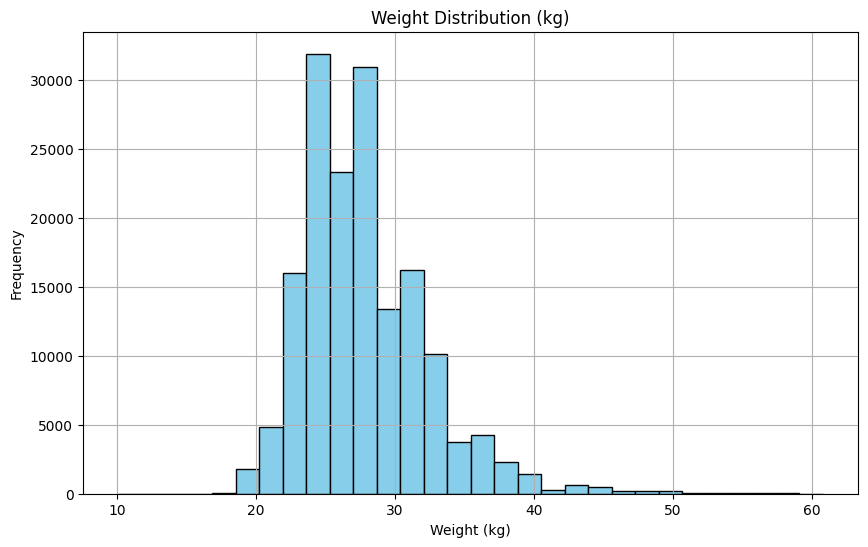

In [292]:
#weight 열 표 출력
plt.figure(figsize=(10, 6))
plt.hist(df[df['weight'] != 0]['weight'], bins=30, color='skyblue', edgecolor='black')
plt.title('Weight Distribution (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

height 정보 출력

In [302]:
df['height'].unique()

#height 열 결측값 0으로 처리
df['height'] = df['height'].fillna(0)

df['height'].unique()

array(['5\' 8"', '5\' 6"', '5\' 4"', '5\' 5"', '5\' 9"', '5\' 3"',
       '5\' 2"', '5\' 7"', '5\' 1"', '5\' 10"', '6\' 0"', '4\' 10"',
       '6\' 1"', '5\' 11"', '5\' 0"', 0, '4\' 11"', '4\' 8"', '6\' 2"',
       '6\' 3"', '4\' 9"', '4\' 6"', '6\' 4"', '4\' 7"', '6\' 6"'],
      dtype=object)

In [ ]:
#ft -> cm 변환
df['cm'] = (df['height'].astype(str).str.extract(r"(\d+)'[\s]*(\d+)", expand=True).fillna(0).astype(int).apply(lambda x: round((x[0] * 12 + x[1]) * 2.54, 1), axis=1))

df['cm'].unique()

array([172.7, 167.6, 162.6, 165.1, 175.3, 160. , 157.5, 170.2, 154.9,
       177.8, 182.9, 147.3, 185.4, 180.3, 152.4,   0. , 149.9, 142.2,
       188. , 190.5, 144.8, 137.2, 193. , 139.7, 198.1])

In [306]:
df['height'] = df['cm']

df['height'].unique()

array([172.7, 167.6, 162.6, 165.1, 175.3, 160. , 157.5, 170.2, 154.9,
       177.8, 182.9, 147.3, 185.4, 180.3, 152.4,   0. , 149.9, 142.2,
       188. , 190.5, 144.8, 137.2, 193. , 139.7, 198.1])

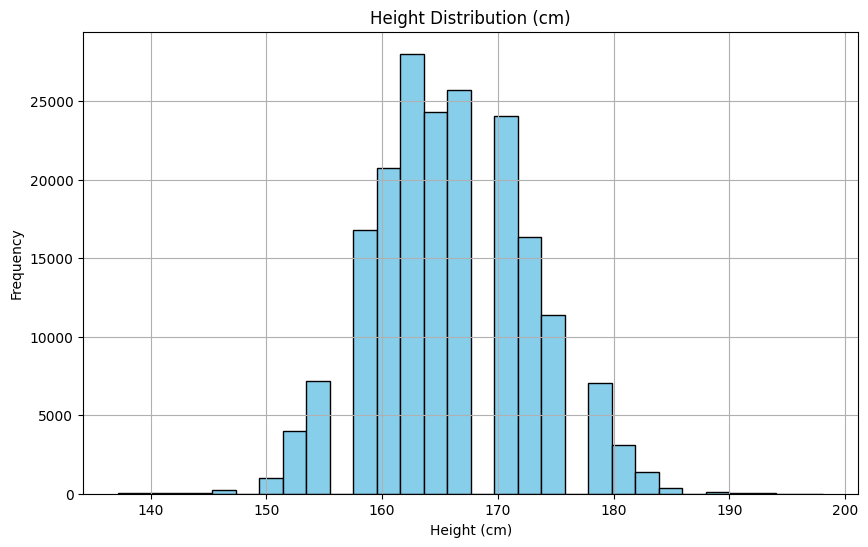

In [311]:
#height 열 표 출력
plt.figure(figsize=(10, 6))
plt.hist(df[df['height'] != 0]['height'], bins=30, color='skyblue', edgecolor='black')
plt.title('Height Distribution (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

size 정보 출력

In [297]:
df['size'].unique()

array([14, 12,  4,  8, 21,  1, 20,  2, 17, 16, 28, 36, 35, 24, 15,  5, 51,
       32, 23, 48, 45,  9, 13, 34, 39,  7, 25, 58, 26, 57, 29, 11,  0, 40,
        3, 33, 27, 43, 42, 19, 44, 54, 38, 10, 49, 52, 46,  6, 37, 22, 56,
       50, 41, 30, 55, 18], dtype=int64)

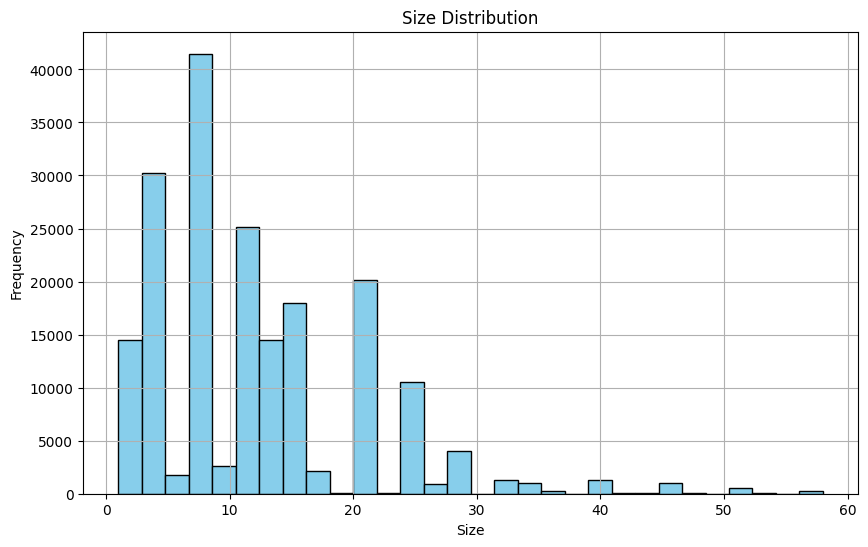

In [298]:
#Size 열 표 출력
plt.figure(figsize=(10, 6))
plt.hist(df[df['size'] != 0]['size'], bins=30, color='skyblue', edgecolor='black')
plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

age 정보 출력

In [300]:
df['age'].unique()

#age 열 결측값 0으로 처리
df['age'] = df['age'].fillna(0)

df['age'].unique()

array([ 28.,  36., 116.,  34.,  27.,  45.,  65.,  33.,  30.,  26.,  29.,
        32.,  35.,  21.,  20.,  37.,  50.,  43.,  47.,  53.,  31.,  38.,
        48.,  40.,  52.,  24.,  25.,   0.,  44.,  39.,  49.,  22.,  42.,
        69.,  23.,  17.,  41.,  59.,  56.,  46.,  54.,  51.,  58.,  55.,
        57.,  62.,  19.,  60.,  63.,  61.,  66.,  15.,  70.,  16.,  64.,
        18.,  87.,  77.,  68.,  67.,   3.,  75.,  91.,  85., 117.,  72.,
         2.,  73.,  71.,  92.,   9.,  99.,   1.,  14., 106.,   8., 109.,
         4.,  76., 100.,   5.,  74., 113., 115.,  81.,  78.,  97.,  88.,
       112.])

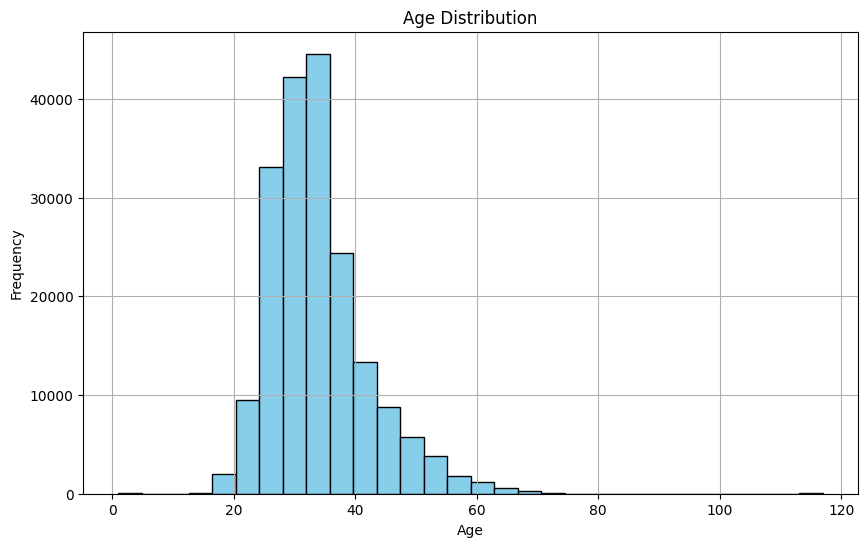

In [301]:
#age 열 표 출력
plt.figure(figsize=(10, 6))
plt.hist(df[df['age'] != 0]['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()